In [1]:
import math
import numpy as np
import cmath as cm
import random
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import sklearn
from sklearn.utils import shuffle
from tabulate import tabulate
import datetime

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import torch.optim as optim

#Import the module containing the class pole
import import_ipynb
import module
from module import unif_pole, T1, T2, Einput, seerealimagpart, generate_timestamp
from module import Nreal, Nimag, hbarc, directory
from module import Ereal, Eimag, Erealfar, Eimagfar, labelz, NEpoints
from module import skip_duplicate, export_data, import_data, get_traintest

import dnn_models
from dnn_models import MLP1L, CNN2D, CNN2DB

Number of poles to be generated per class: 100000000
Ndata to be generated= 400000000
Your directory is: dataset_sigma-plus_pion-minus


In [2]:
N = 10000
device = 'cuda'

In [3]:
clas_data0 = pd.read_csv("sigma_plus-pion_minus.csv")
x_data0 = np.asarray(clas_data0["M"].tolist())
x_data0 *= 1000
y_data0 = np.asarray(clas_data0["dsigmadM"].tolist())
y_error0 = np.asarray(clas_data0["Full errors"].tolist())

In [4]:
clas_data1 = pd.read_csv("sigma_minus-pion_plus.csv")
x_data1 = np.asarray(clas_data1["M"].tolist())
x_data1 *= 1000
y_data1 = np.asarray(clas_data1["dsigmadM"].tolist())
y_error1 = np.asarray(clas_data1["Full errors"].tolist())

In [5]:
clas_data2 = pd.read_csv("sigma_0-pion_0.csv")
x_data2 = np.asarray(clas_data2["M"].tolist())
x_data2 *= 1000
y_data2 = np.asarray(clas_data2["dsigmadM"].tolist())
y_error2 = np.asarray(clas_data2["Full errors"].tolist())

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\S'
/var/folders/c5/0thgw44d7rdfzbt06_p9nlbr0000gn/T/ipykernel_13391/1061816154.py:3: SyntaxWarning: invalid escape sequence '\o'
  plt.axvline(T2*197.3, color='red',ls='--', lw=3, label='$\overline{K}N$ threshold')
/var/folders/c5/0thgw44d7rdfzbt06_p9nlbr0000gn/T/ipykernel_13391/1061816154.py:7: SyntaxWarning: invalid escape sequence '\S'
  plt.xlabel('m$_{\Sigma^+ \pi^-}$ [MeV]')


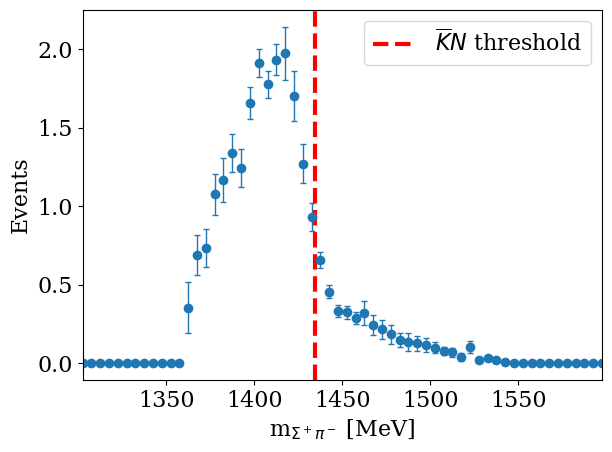

In [6]:
plt.rcParams.update({'font.size': 16, 'font.family':'serif', 'font.weight':'light', 'savefig.dpi':100})
plt.errorbar(x_data0,y_data0,yerr=y_error0, fmt='o', linewidth=1, capsize=2)
plt.axvline(T2*197.3, color='red',ls='--', lw=3, label='$\overline{K}N$ threshold')
plt.xlim(x_data0[0], x_data0[-1])
plt.legend()
plt.ylabel('Events')
plt.xlabel('m$_{\Sigma^+ \pi^-}$ [MeV]')
plt.savefig('CLAS_sigma-plus_pion-minus.png', transparent=True, bbox_inches='tight')
plt.tight_layout()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\S'
/var/folders/c5/0thgw44d7rdfzbt06_p9nlbr0000gn/T/ipykernel_13391/46392877.py:3: SyntaxWarning: invalid escape sequence '\o'
  plt.axvline(T2*197.3, color='red',ls='--', lw=3, label='$\overline{K}N$ threshold')
/var/folders/c5/0thgw44d7rdfzbt06_p9nlbr0000gn/T/ipykernel_13391/46392877.py:7: SyntaxWarning: invalid escape sequence '\S'
  plt.xlabel('m$_{\Sigma^- \pi^+}$ [MeV]', fontsize=18)


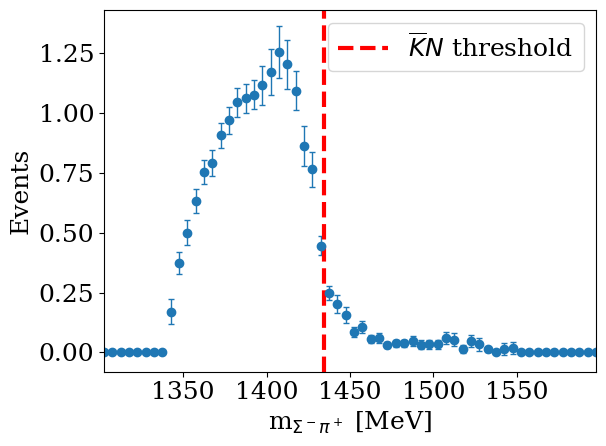

In [7]:
plt.rcParams.update({'font.size': 18, 'font.family':'serif', 'font.weight':'light', 'savefig.dpi':100})
plt.errorbar(x_data1,y_data1,yerr=y_error1, fmt='o', linewidth=1, capsize=2)
plt.axvline(T2*197.3, color='red',ls='--', lw=3, label='$\overline{K}N$ threshold')
plt.xlim(x_data1[0], x_data1[-1])
plt.legend()
plt.ylabel('Events', fontsize=18)
plt.xlabel('m$_{\Sigma^- \pi^+}$ [MeV]', fontsize=18)
plt.savefig('CLAS_sigma-minus_pion-plus.png', transparent=True, bbox_inches='tight')
plt.tight_layout()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\S'
/var/folders/c5/0thgw44d7rdfzbt06_p9nlbr0000gn/T/ipykernel_13391/1214520588.py:3: SyntaxWarning: invalid escape sequence '\o'
  plt.axvline(T2*197.3, color='red',ls='--', lw=3, label='$\overline{K}N$ threshold')
/var/folders/c5/0thgw44d7rdfzbt06_p9nlbr0000gn/T/ipykernel_13391/1214520588.py:7: SyntaxWarning: invalid escape sequence '\S'
  plt.xlabel('m$_{\Sigma^0 \pi^0}$ [MeV]')


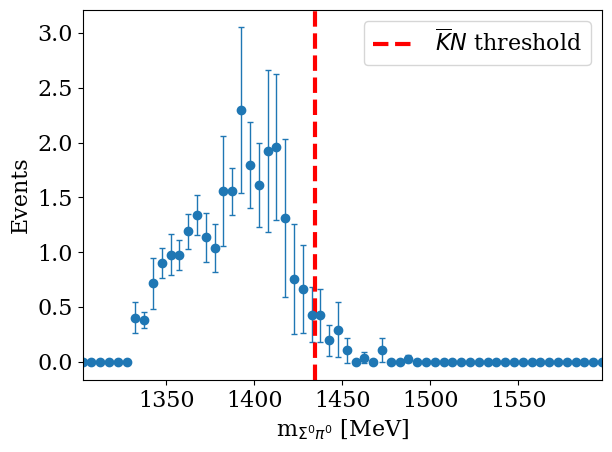

In [8]:
plt.rcParams.update({'font.size': 16, 'font.family':'serif', 'font.weight':'light', 'savefig.dpi':100})
plt.errorbar(x_data2,y_data2,yerr=y_error2, fmt='o', linewidth=1, capsize=2)
plt.axvline(T2*197.3, color='red',ls='--', lw=3, label='$\overline{K}N$ threshold')
plt.xlim(x_data2[0], x_data2[-1])
plt.legend()
plt.ylabel('Events')
plt.xlabel('m$_{\Sigma^0 \pi^0}$ [MeV]')
plt.savefig('CLAS_sigma-0_pion-0.png', transparent=True, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [9]:
def gen_inference(x_data, y_data, y_error):
    # Generate dataset for output label 00: 'no nearby pole'

    Events = []

    for i in range(N):
        noise = np.asarray(list(map(lambda x: np.random.uniform(-x, x), y_error)))
        events = y_data + noise
        #evetns = np.clip(events, 0.0, max(events))
        Events.append(events)

    Energy = []

    for i in range(N):
        noise = np.asarray(list(map(lambda x: np.random.uniform(-2.5, 2.5), y_error)))
        x = x_data + noise
        Energy.append(x)

    labels = np.random.randint(1, size=N)

    Energy = np.asarray(Energy)
    Events = np.asarray(Events)

    ModEsqnorm = np.array(list(map(lambda x: normalize(x), Events)))
    Events = np.array(ModEsqnorm)

    return Energy, Events, labels

In [10]:
def normalize(x_array):
    #input must be an array
    #output: normalized array

    delx = max(x_array)

    if delx != 0:
        norm_array = np.array(list(map(lambda x: x/delx, x_array)))
    else:
        norm_array = x_array

    return norm_array

In [11]:
Energy0, Events0, labels0 = gen_inference(x_data0, y_data0, y_error0)
Energy1, Events1, labels1 = gen_inference(x_data2, y_data2, y_error2)
Energy2, Events2, labels2 = gen_inference(x_data1, y_data1, y_error1)

<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\S'
/var/folders/c5/0thgw44d7rdfzbt06_p9nlbr0000gn/T/ipykernel_13391/573480534.py:9: SyntaxWarning: invalid escape sequence '\o'
  plt.axvline(T2*197.3, color='red',ls='--', lw=3, label='$\overline{K}N$ threshold')
/var/folders/c5/0thgw44d7rdfzbt06_p9nlbr0000gn/T/ipykernel_13391/573480534.py:13: SyntaxWarning: invalid escape sequence '\S'
  plt.xlabel('m$_{\Sigma^- \pi^+}$ [MeV]')


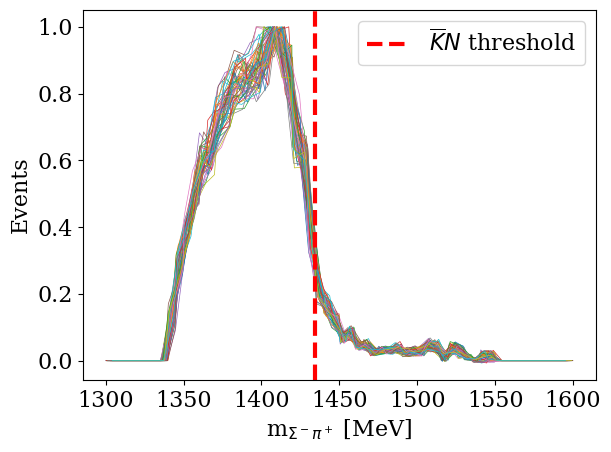

In [17]:
data_num = 50
EinputXX = Energy2[:data_num]
ModEsqXX = Events2[:data_num]

plt.rcParams.update({'font.size': 16, 'font.family':'serif', 'font.weight':'light', 'savefig.dpi':300})
for i in range(data_num): 
    plt.plot(EinputXX[i], ModEsqXX[i], linewidth=0.5)

plt.axvline(T2*197.3, color='red',ls='--', lw=3, label='$\overline{K}N$ threshold')
#plt.xlim(x_data0[0], x_data0[-1])
plt.legend()
plt.ylabel('Events')
plt.xlabel('m$_{\Sigma^- \pi^+}$ [MeV]')
plt.savefig(f'CLAS_sigma-minus_pion-plus-inf.png', transparent=True, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [16]:

out = directory


input_inference = np.float32(np.stack((Energy2, Events2), axis=1))
input_inference = np.reshape(input_inference,(input_inference.shape[0], 1, 2, -1))
#inputtraining.reshape(inputtraining.shape[0], -1)
#print(inputtraining.shape)
#inputtraining = pickle.load(open(os.path.join(out, 'ModEsq_curr{:02d}.pkl'.format(curriculum)), 'rb'))
#inputtraining = np.float32(np.array(inputtraining))
#inputtraining = torch.from_numpy(inputtraining).type(torch.float)
print(input_inference.shape)

output_inference = np.array(labels0)


pickle.dump(input_inference, open(os.path.join('Inference_data2.pkl'),'wb'), protocol=4)
pickle.dump(output_inference, open(os.path.join('Inference_labels2.pkl'),'wb'), protocol=4)

(10000, 1, 2, 60)


In [17]:
inference_data = pickle.load(open(os.path.join('Inference_data0.pkl'), 'rb'))
#inference_data = np.float32(np.array(inference_data))
inference_data = torch.from_numpy(inference_data).type(torch.float)
#inference_data = inference_data.to(device)

inference_labels = pickle.load(open(os.path.join('Inference_labels0.pkl'), 'rb'))
#inference_labels = np.array(inference_labels)
inference_labels = torch.from_numpy(inference_labels).type(torch.long)
#inference_labels = inference_labels.to(device)

In [18]:
class GraphDataset(Dataset):

    def __init__(self, plots, labels, transform=None, transform_label=None):
        self.plots = plots
        self.labels = labels
        self.transform = transform
        self.transform_label = transform_label

    def __getitem__(self, idx):
        label = self.labels[idx]
        plot = self.plots[idx]

        if self.transform:
            plot = self.transform(np.array(plot))

        if self.transform_label:
            label = self.transform_label(np.array(label))

        return plot, label

    def __len__(self):
        return len(self.labels)

#train_dataset = GraphDataset(train_plots, train_labels, transform=None)
inference_dataset = GraphDataset(inference_data, inference_labels, transform=None)

batch_size = 1

#train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
inference_dataloader = DataLoader(inference_dataset, batch_size=batch_size, shuffle=True)

In [19]:
def inference(infer_dataloader, out, epochs):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    # Initialize lists of losses and accuracies
    #model = MLP1L()
    pred_value = []
    
    for epoch in epochs:
        path = f"{out}_snapshot/epoch{epoch:06d}/MLP1L.pt"

        #Load the model and the optimizer of the previous run
        saved_model = torch.load(path, weights_only=True, map_location=torch.device(device))
        model.load_state_dict(saved_model['model_state_dict'])
        #optimizer.load_state_dict(saved_model['optimizer_state_dict'])

        model.to(device)

        model.eval()

        #Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
        # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
        with torch.no_grad():
            for i, (X, y) in enumerate(infer_dataloader):
                pred = model(X)
                pred_value.append(pred.argmax(1))

    return pred_value

    #print(f"Test Error: \n Accuracy: {(100*test_accu):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [20]:
def inference_regression(infer_dataloader, out):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    # Initialize lists of losses and accuracies
    #model = MLP1L()
    model = CNN2DR()
    path = f"{out}/MLP1L.pt"

    #Load the model and the optimizer of the previous run
    saved_model = torch.load(path, weights_only=True)
    model.load_state_dict(saved_model['model_state_dict'])
    #optimizer.load_state_dict(saved_model['optimizer_state_dict'])

    model.to(device)

    model.eval()
    pred_value = [] #np.zeros(len(infer_dataloader))

    #Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for i, (X, y) in enumerate(infer_dataloader):
            pred = model(X)
            pred_value.append(pred)
            #pred_value[i] = (pred.argmax(1))
        pred_value = np.array(pred_value)
        pred_array = np.mean(pred_value, axis=0)
    return pred_array

    #print(f"Test Error: \n Accuracy: {(100*test_accu):>0.1f}%, Avg loss: {test_loss:>8f} \n")

<>:34: SyntaxWarning: invalid escape sequence '\S'
<>:34: SyntaxWarning: invalid escape sequence '\S'
/var/folders/c5/0thgw44d7rdfzbt06_p9nlbr0000gn/T/ipykernel_62872/808797162.py:34: SyntaxWarning: invalid escape sequence '\S'
  plt.title(f"$\Sigma^+\pi^-$; Stage: {curr}")


Prediction: [1, 15], [99.872  0.128]%


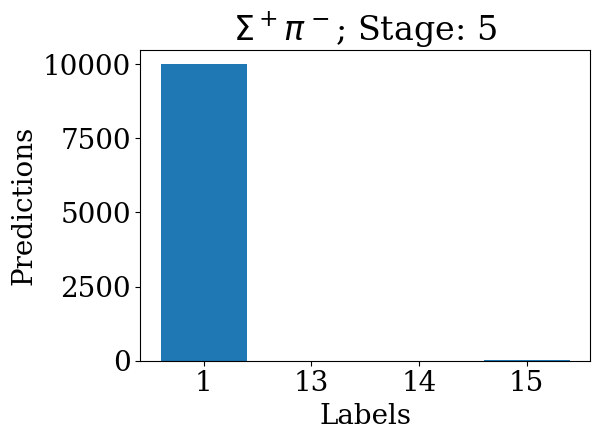

In [26]:
plt.rcParams.update({'font.size': 20})
model = CNN2D()
curr = 5
outputs = 4
epochs = [221, 333, 218, 228, 195]
x = [1, 13, 14, 15]
out = f"250218_lambda_curriculum{curr:02d}"#_snapshot/epoch{epoch:06d}"
#optim = "SGD"
#out = "CNN2D-5_Adam-0_24-12-22_full"
#out = "CNN2D-5_Adam-1_24-12-22_full"
#out = "CNN2D-5_Adam-0N_24-12-29_full"
#out = "CNN2D-5_Adam-1N_24-12-29_full"
#out = "lambda_curriculum06_full"
#out=f"HADRON2025_CNN2D5_Adam_Norm_full"
device = 'cpu'
preds = inference(inference_dataloader, out, epochs)

labels, counts = np.unique(preds, return_counts=True)
predicted_label = labels[np.argmax(counts)]
predpred = list(map(lambda label: x[label], labels))
print(f"Prediction: {predpred}, {counts/len(preds)*100}%")
#print(f"Test output count per value: {}")

predictions = np.zeros(outputs)
#labels = np.unique(preds, return_counts=True)[0]
#counts = np.unique(preds, return_counts=True)[1]

for label, count in zip(labels, counts):
    predictions[int(label)] = count

predictions = predictions/5
x0 = list(range(outputs))    
#list(range(outputs))
plt.title(f"$\Sigma^+\pi^-$; Stage: {curr}")
plt.xticks(x0, x)
#plt.ylim(0, 10500)
plt.bar(x0, predictions)
plt.xlabel("Labels")
plt.ylabel("Predictions")
# Adding annotations
"""
for i, value in enumerate(predictions):
    plt.text(i, value + 5, str(value), ha='center')
"""
plt.tight_layout()
plt.savefig(f'250219_lambda_curr{curr:02d}-inference')
plt.show()

In [48]:
curr = 1
saved_epochs = [436, 482, 458, 440, 414]
x = [1, 2, 3, 4]
#optim = "SGD"
#optim = "Adam"
device = 'cpu'
num_out = 4



#model = 'MLP6.model'
x = [str(element) for element in list(range(num_out))]

inference = {'Labels': x}
df = pd.DataFrame(inference)

for epoch in saved_epochs:
    #Events, labels = gen_inference()
    out = directory

    inference_data = pickle.load(open(os.path.join('Inference_data0.pkl'), 'rb'))
    #inference_data = np.float32(np.array(inference_data))
    inference_data = torch.from_numpy(inference_data).type(torch.float)
    #inference_data = inference_data.to(device)

    inference_labels = pickle.load(open(os.path.join('Inference_labels0.pkl'), 'rb'))
    #inference_labels = np.array(inference_labels)
    inference_labels = torch.from_numpy(inference_labels).type(torch.long)
    #inference_labels = inference_labels.to(device)

    inference_dataset = GraphDataset(inference_data, inference_labels, transform=None)

    batch_size = 1

    #train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    inference_dataloader = DataLoader(inference_dataset, batch_size=batch_size, shuffle=True)

    out = f"250219_lambda_curriculum{curr:02d}_snapshot/epoch{epoch:06d}"

    model = CNN2D()
    #model = MLP1L()
    path = f"{out}/MLP1L.pt"

    #Load the model and the optimizer of the previous run
    saved_model = torch.load(path, weights_only=True)
    model.load_state_dict(saved_model['model_state_dict'])
    #optimizer.load_state_dict(saved_model['optimizer_state_dict'])

    model.to(device)

    model.eval()
    pred_value = np.zeros(len(inference_dataloader))

    #Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for i, (X, y) in enumerate(inference_dataloader):
            pred = model(X)
            pred_value[i] = (pred.argmax(1))

    preds = pred_value

    labels, counts = np.unique(preds, return_counts=True)
    #predicted_label = labels[np.argmax(counts)]
    #print(f"Prediction: {int(predicted_label)}, {np.max(counts)/len(preds)*100}%")
    #print(f"Test output count per value: {}")

    predictions = np.zeros(num_out)
    #labels = np.unique(preds, return_counts=True)[0]
    #counts = np.unique(preds, return_counts=True)[1]

    for label, count in zip(labels, counts):
        predictions[int(label)] = count

    df[f'{epoch}'] = predictions

    #print(df)
df['Mean'] = df.mean(axis=1, numeric_only=True)
df['Standard Deviation'] = df.std(axis=1, numeric_only=True)
df.style

,Labels,436,482,458,440,414,Mean,Standard Deviation
0,0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,0.000000
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
str_epoch = 180
end_epoch = 220

curr = 5
#optim = "SGD"
optim = "Adam"
device = 'cpu'
num_out = 4



#model = 'MLP6.model'
x = [str(element) for element in list(range(num_out))]

inference = {'Labels': x}
df = pd.DataFrame(inference)

for epoch in range(str_epoch, end_epoch + 1, 5):
    #Events, labels = gen_inference()
    out = directory

    inference_data = pickle.load(open(os.path.join('Inference_data0.pkl'), 'rb'))
    #inference_data = np.float32(np.array(inference_data))
    inference_data = torch.from_numpy(inference_data).type(torch.float)
    #inference_data = inference_data.to(device)

    inference_labels = pickle.load(open(os.path.join('Inference_labels0.pkl'), 'rb'))
    #inference_labels = np.array(inference_labels)
    inference_labels = torch.from_numpy(inference_labels).type(torch.long)
    #inference_labels = inference_labels.to(device)

    inference_dataset = GraphDataset(inference_data, inference_labels, transform=None)

    batch_size = 1

    #train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    inference_dataloader = DataLoader(inference_dataset, batch_size=batch_size, shuffle=True)

    #out = "CNN2D-5_Adam-0_24-12-22_full"
    #out = "CNN2D-5_Adam-1_24-12-22_full"
    #out = "CNN2D-5_Adam-0N_24-12-29_full"
    #out = "CNN2D-5_Adam-1N_24-12-29_full"
    #out = "lambda_curriculum06_full"
    #out = f"250123_lambda_curriculum01_snapshot/epoch{epoch:06d}"
    out = f"250130_lambda_curriculum{curr:02d}_snapshot/epoch{epoch:06d}"

    model = CNN2D()
    #model = MLP1L()
    path = f"{out}/MLP1L.pt"

    #Load the model and the optimizer of the previous run
    saved_model = torch.load(path, weights_only=True)
    model.load_state_dict(saved_model['model_state_dict'])
    #optimizer.load_state_dict(saved_model['optimizer_state_dict'])

    model.to(device)

    model.eval()
    pred_value = np.zeros(len(inference_dataloader))

    #Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for i, (X, y) in enumerate(inference_dataloader):
            pred = model(X)
            pred_value[i] = (pred.argmax(1))

    preds = pred_value

    labels, counts = np.unique(preds, return_counts=True)
    #predicted_label = labels[np.argmax(counts)]
    #print(f"Prediction: {int(predicted_label)}, {np.max(counts)/len(preds)*100}%")
    #print(f"Test output count per value: {}")

    predictions = np.zeros(num_out)
    #labels = np.unique(preds, return_counts=True)[0]
    #counts = np.unique(preds, return_counts=True)[1]

    for label, count in zip(labels, counts):
        predictions[int(label)] = count

    df[f'{epoch}'] = predictions

    #print(df)
df['Mean'] = df.mean(axis=1, numeric_only=True)
df['Standard Deviation'] = df.std(axis=1, numeric_only=True)
df.style

FileNotFoundError: [Errno 2] No such file or directory: '250130_lambda_curriculum05_snapshot/epoch000180/MLP1L.pt'

In [ ]:
out = "CNN2DR-5_Adam-0_24-12-29_full"

str_epoch = 800
end_epoch = 1000

curr = 15
#optim = "SGD"
optim = "Adam"
device = 'cpu'



#model = 'MLP6.model'
x = [str(element) for element in list(range(5))]

inference = {'Labels': x}
df = pd.DataFrame(inference)

for epoch in range(str_epoch, end_epoch + 1, 5):
    #Events, labels = gen_inference()
    out = directory

    inference_data = pickle.load(open(os.path.join('Inference_data0.pkl'), 'rb'))
    #inference_data = np.float32(np.array(inference_data))
    inference_data = torch.from_numpy(inference_data).type(torch.float)
    #inference_data = inference_data.to(device)

    inference_labels = pickle.load(open(os.path.join('Inference_labels0.pkl'), 'rb'))
    #inference_labels = np.array(inference_labels)
    inference_labels = torch.from_numpy(inference_labels).type(torch.long)
    #inference_labels = inference_labels.to(device)

    inference_dataset = GraphDataset(inference_data, inference_labels, transform=None)

    batch_size = 1

    #train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    inference_dataloader = DataLoader(inference_dataset, batch_size=batch_size, shuffle=True)

    #out = "CNN2D-5_Adam-0_24-12-22_full"
    #out = "CNN2D-5_Adam-1_24-12-22_full"
    #out = "CNN2D-5_Adam-0N_24-12-29_full"
    out = "CNN2D-5_Adam-1N_24-12-29_full"

    model = CNN2D()
    #model = MLP1L()
    path = f"{out}/MLP1L.pt"

    #Load the model and the optimizer of the previous run
    saved_model = torch.load(path, weights_only=True)
    model.load_state_dict(saved_model['model_state_dict'])
    #optimizer.load_state_dict(saved_model['optimizer_state_dict'])

    model.to(device)

    model.eval()
    pred_value = np.zeros(len(inference_dataloader))

    #Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for i, (X, y) in enumerate(inference_dataloader):
            pred = model(X)
            pred_value[i] = (pred.argmax(1))

    preds = pred_value

    labels, counts = np.unique(preds, return_counts=True)
    #predicted_label = labels[np.argmax(counts)]
    #print(f"Prediction: {int(predicted_label)}, {np.max(counts)/len(preds)*100}%")
    #print(f"Test output count per value: {}")

    predictions = np.zeros(5)
    #labels = np.unique(preds, return_counts=True)[0]
    #counts = np.unique(preds, return_counts=True)[1]

    for label, count in zip(labels, counts):
        predictions[int(label)] = count

    df[f'{epoch}'] = predictions

    #print(df)
df['Mean'] = df.mean(axis=1, numeric_only=True)
df['Standard Deviation'] = df.std(axis=1, numeric_only=True)
df.style

inference_regression(inference_dataloader, out)

RuntimeError: Error(s) in loading state_dict for CNN2DR:
	size mismatch for fc2.weight: copying a param with shape torch.Size([5, 60]) from checkpoint, the shape in current model is torch.Size([3, 60]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([5]) from checkpoint, the shape in current model is torch.Size([3]).

In [ ]:
Energy1, Events1, labels1 = gen_inference(x_data1, y_data1, y_error1)


out = directory


input_inference = np.float32(np.stack((Energy1, Events1), axis=1))
input_inference = np.reshape(input_inference,(input_inference.shape[0], 1, 2, -1))
#inputtraining.reshape(inputtraining.shape[0], -1)
#print(inputtraining.shape)
#inputtraining = pickle.load(open(os.path.join(out, 'ModEsq_curr{:02d}.pkl'.format(curriculum)), 'rb'))
#inputtraining = np.float32(np.array(inputtraining))
#inputtraining = torch.from_numpy(inputtraining).type(torch.float)
print(input_inference.shape)

output_inference = np.array(labels1)


pickle.dump(input_inference, open(os.path.join('Inference_data1.pkl'),'wb'), protocol=4)
pickle.dump(output_inference, open(os.path.join('Inference_labels1.pkl'),'wb'), protocol=4)

(100, 1, 2, 60)


In [ ]:
inference_data = pickle.load(open(os.path.join('Inference_data1.pkl'), 'rb'))
#inference_data = np.float32(np.array(inference_data))
inference_data = torch.from_numpy(inference_data).type(torch.float)
#inference_data = inference_data.to(device)

inference_labels = pickle.load(open(os.path.join('Inference_labels0.pkl'), 'rb'))
#inference_labels = np.array(inference_labels)
inference_labels = torch.from_numpy(inference_labels).type(torch.long)
#inference_labels = inference_labels.to(device)

In [ ]:
#train_dataset = GraphDataset(train_plots, train_labels, transform=None)
inference_dataset = GraphDataset(inference_data, inference_labels, transform=None)

batch_size = 1

#train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
inference_dataloader = DataLoader(inference_dataset, batch_size=batch_size, shuffle=True)

Prediction: 3, 95.0%


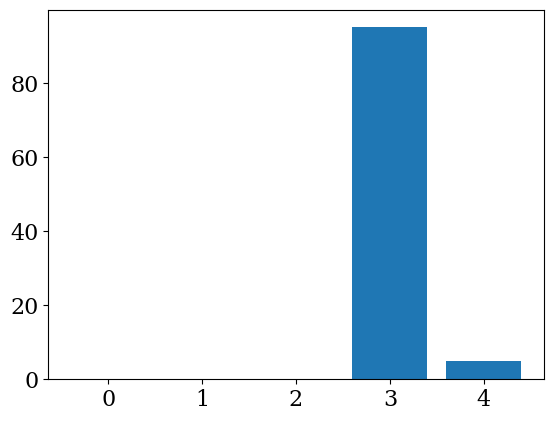

In [ ]:
curr = 4
#optim = "SGD"
optim = "Adam"
out=f"HADRON2025_CNN2D5_Adam_Norm_full"
device = 'cpu'
preds = inference(inference_dataloader, out)

labels, counts = np.unique(preds, return_counts=True)
predicted_label = labels[np.argmax(counts)]
print(f"Prediction: {int(predicted_label)}, {np.max(counts)/len(preds)*100}%")
#print(f"Test output count per value: {}")

predictions = np.zeros(5)
#labels = np.unique(preds, return_counts=True)[0]
#counts = np.unique(preds, return_counts=True)[1]

for label, count in zip(labels, counts):
    predictions[int(label)] = count

x = list(range(5))
plt.bar(x, predictions)
plt.xticks(x)
plt.show()
#plt.xlim(0,2.5)
#plt.figure(figsize=(1,3))

In [ ]:
str_epoch = 800
end_epoch = 1000

curr = 4
#optim = "SGD"
optim = "Adam"
device = 'cpu'



#model = 'MLP6.model'
x = [str(element) for element in list(range(5))]

inference = {'Labels': x}
df = pd.DataFrame(inference)

for epoch in range(str_epoch, end_epoch + 1, 5):
    #Events, labels = gen_inference()
    out = directory

    inference_data = pickle.load(open(os.path.join('Inference_data1.pkl'), 'rb'))
    #inference_data = np.float32(np.array(inference_data))
    inference_data = torch.from_numpy(inference_data).type(torch.float)
    #inference_data = inference_data.to(device)

    inference_labels = pickle.load(open(os.path.join('Inference_labels1.pkl'), 'rb'))
    #inference_labels = np.array(inference_labels)
    inference_labels = torch.from_numpy(inference_labels).type(torch.long)
    #inference_labels = inference_labels.to(device)

    inference_dataset = GraphDataset(inference_data, inference_labels, transform=None)

    batch_size = 1

    #train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    inference_dataloader = DataLoader(inference_dataset, batch_size=batch_size, shuffle=True)

    out=f"HADRON2025_CNN2D5_Adam_Norm_snapshot/epoch{epoch:06d}"

    model = CNN2D()
    #model = MLP1L()
    path = f"{out}/MLP1L.pt"

    #Load the model and the optimizer of the previous run
    saved_model = torch.load(path, weights_only=True)
    model.load_state_dict(saved_model['model_state_dict'])
    #optimizer.load_state_dict(saved_model['optimizer_state_dict'])

    model.to(device)

    model.eval()
    pred_value = np.zeros(len(inference_dataloader))

    #Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for i, (X, y) in enumerate(inference_dataloader):
            pred = model(X)
            pred_value[i] = (pred.argmax(1))

    preds = pred_value

    labels, counts = np.unique(preds, return_counts=True)
    #predicted_label = labels[np.argmax(counts)]
    #print(f"Prediction: {int(predicted_label)}, {np.max(counts)/len(preds)*100}%")
    #print(f"Test output count per value: {}")

    predictions = np.zeros(5)
    #labels = np.unique(preds, return_counts=True)[0]
    #counts = np.unique(preds, return_counts=True)[1]

    for label, count in zip(labels, counts):
        predictions[int(label)] = count

    df[f'{epoch}'] = predictions

    #print(df)
df['Mean'] = df.mean(axis=1, numeric_only=True)
df['Standard Deviation'] = df.std(axis=1, numeric_only=True)
df.style

,Labels,800,805,810,815,820,825,830,835,840,845,850,855,860,865,870,875,880,885,890,895,900,905,910,915,920,925,930,935,940,945,950,955,960,965,970,975,980,985,990,995,1000,Mean,Standard Deviation
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,100.000000,90.000000,100.000000,89.000000,100.000000,100.000000,76.000000,97.000000,100.000000,84.000000,44.000000,86.000000,100.000000,100.000000,62.000000,100.000000,98.000000,100.000000,93.000000,100.000000,26.000000,98.000000,99.000000,78.000000,66.000000,98.000000,100.000000,67.000000,100.000000,81.000000,81.000000,99.000000,42.000000,72.000000,88.000000,100.000000,99.000000,100.000000,100.000000,98.000000,95.000000,87.951220,17.941573
4,4,0.000000,10.000000,0.000000,11.000000,0.000000,0.000000,24.000000,3.000000,0.000000,16.000000,56.000000,14.000000,0.000000,0.000000,38.000000,0.000000,2.000000,0.000000,7.000000,0.000000,74.000000,2.000000,1.000000,22.000000,34.000000,2.000000,0.000000,33.000000,0.000000,19.000000,19.000000,1.000000,58.000000,28.000000,12.000000,0.000000,1.000000,0.000000,0.000000,2.000000,5.000000,12.048780,17.941573
